In [37]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [38]:
reviews_df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
reviews_df.head()
reviews_df.columns = ['review', 'class'] 
reviews_df

,review,class
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [47]:
for i in range (0, 20491):
    if reviews_df['class'][i] == "1":
        reviews_df['class'][i] = 0
    if reviews_df['class'][i] == "2":
        reviews_df['class'][i] = 0
    if reviews_df['class'][i] == "3":
        reviews_df['class'][i] = 0
    if reviews_df['class'][i] == "4":
        reviews_df['class'][i] = 1
    if reviews_df['class'][i] == "5":
        reviews_df['class'][i] = 1

reviews_df

,review,class
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",1
20487,great location price view hotel great quick pl...,1
20488,"ok just looks nice modern outside, desk staff ...",0
20489,hotel theft ruined vacation hotel opened sept ...,0


In [48]:
reviews_df['class'].value_counts()

1    15093
0     5398
Name: class, dtype: int64

In [49]:
reviews_df = reviews_df.astype('U')
features = reviews_df['review']
targets = reviews_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(reviews_df['review'])

In [51]:
# Let's see total number of unique words present in all the reveiws combined
vocab_size = len(tokenizer.index_word)

# tokeninzer.index_word is a dictonary which can be user to view all the unique words and there ID's.

print(f'There are total {vocab_size} unique words present')

There are total 52211 unique words present


In [52]:
reviews_df = reviews_df.astype('U')
features = reviews_df['review']
targets = reviews_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [53]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [54]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

In [56]:
# Model
max_len = 256 # length of each input
embedding_size = 32

model = Sequential()

model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))

model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 32)           1670784   
_________________________________________________________________
lstm_2 (LSTM)                (None, 256, 150)          109800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 150)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               38656     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [57]:
# Let's train our model
y_train = y_train.astype(float)
y_test = y_test.astype(float)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
257/257 [==============================] - 218s 831ms/step - loss: 0.5819 - accuracy: 0.7338 - val_loss: 0.5669 - val_accuracy: 0.7438
Epoch 2/15
257/257 [==============================] - 211s 821ms/step - loss: 0.5721 - accuracy: 0.7416 - val_loss: 0.5631 - val_accuracy: 0.7480
Epoch 3/15
257/257 [==============================] - 201s 783ms/step - loss: 0.5640 - accuracy: 0.7527 - val_loss: 0.5936 - val_accuracy: 0.7465
Epoch 4/15
257/257 [==============================] - 200s 777ms/step - loss: 0.5517 - accuracy: 0.7550 - val_loss: 0.5749 - val_accuracy: 0.7480
Epoch 5/15
257/257 [==============================] - 202s 788ms/step - loss: 0.5501 - accuracy: 0.7571 - val_loss: 0.6032 - val_accuracy: 0.7438
Epoch 6/15
257/257 [==============================] - 210s 819ms/step - loss: 0.5407 - accuracy: 0.7585 - val_loss: 0.6073 - val_accuracy: 0.7441
Epoch 7/15
257/257 [==============================] - 208s 811ms/step - loss: 0.5433 - accuracy: 0.7595 - val_loss: 0.6110 -

<AxesSubplot:>

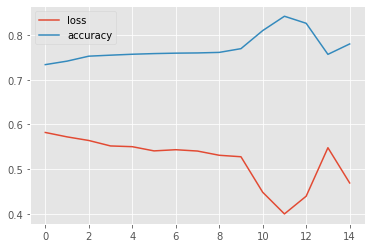

In [58]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','accuracy']].plot()

In [59]:
prediction = (model.predict(X_test)>0.5).astype('int32')

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1050
         1.0       0.74      1.00      0.85      3049

    accuracy                           0.74      4099
   macro avg       0.37      0.50      0.43      4099
weighted avg       0.55      0.74      0.63      4099

